In [10]:
import numpy as np
from ler.utils import get_param_from_json, save_json, load_json, load_pickle, load_hdf5, save_hdf5
import matplotlib.pyplot as plt
import pobs

In [3]:
# get all the hdf5 file names in this directory
dir_ = '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/data/pe_results/unlensed'

import os
files = os.listdir(dir_)

In [14]:
# get all the hdf5 files
files = [f for f in files if f.endswith('.hdf5')]
files = [os.path.join(dir_, f) for f in files]

# data = load_hdf5(files[0])
pe_data = []
for f in files:
    data = load_hdf5(f)
    pe_data.append(data)

In [16]:
len(pe_data)

23

In [5]:
# run the following twice
import pobs
from pobs.pobs import POBS
import pobs.utils as utils
import pobs.modelgenerator as modelgenerator

from importlib import reload
reload(pobs)
reload(pobs.utils)
reload(pobs.modelgenerator)
reload(pobs.pobs)

<module 'pobs.pobs' from '/Users/phurailatpamhemantakumar/phd/mypackages/pobs/pobs/pobs.py'>

In [6]:
test = pobs.POBS(
    posterior1='/Users/phurailatpamhemantakumar/phd/mypackages/pobs/data/pe_results/unlensed/label_index_1_mc_53_q_0p9_time_1249637317_data0_1249637317-2160294_analysis_H1L1V1_result.hdf5',
    posterior2='/Users/phurailatpamhemantakumar/phd/mypackages/pobs/data/pe_results/unlensed/label_index_2_mc_33_q_0p6_time_1240188813_data0_1240188813-6522114_analysis_H1L1V1_result.hdf5',
    create_new=True,
    spin_zero=True,
)

# test = pobs.POBS(
#     posterior1=None,
#     posterior2=None,
#     #create_new=True,
#     spin_zero=True,
# )

astro_lensed is None
getting default astro_lensed data_dict from pobs module
creating a new astro_lensed model...
astro_unlensed is None
getting default astro_unlensed data_dict from pobs module
creating a new astro_unlensed1 model...
creating a new astro_unlensed2 model...
pe_prior is None
getting default pe_prior data_dict from pobs module
creating a new pe_prior model...
creating a new posterior1 model...
creating a new posterior2 model...
creating a new posterior_combine model...


In [116]:
# size=1e3 time=1.7; size=1e4 time=13.5
blu_numerator = test.po_hemanta_numerator(sample_size=10000)[0]

In [117]:
blu_denominator = test.po_hemanta_denominator(sample_size=10000)[0]

In [118]:
len(blu_numerator), len(blu_denominator), np.average(blu_numerator), np.average(blu_denominator)

(9970, 9953, 4.837516835432807e+93, 2.7048997759028224e-138)

In [5]:
# unlensed events
blu = test.log10_bayes_factor(sample_size=10000)
blu

(1.1238917881729572e-115, -114.94927550198915)

In [123]:
# lensed events
blu = test.log10_bayes_factor(sample_size=10000)
blu

(2.9330080422835835e+253, 253.46731325381404)

In [57]:
np.isnan(blu_numerator) is False

False

In [125]:
(1249637317-1240188813)/86400

109.35768518518519

In [58]:
# check inf
idx = blu_numerator!=np.inf
idx &= blu_numerator!=-np.inf
# check for nan
idx &= np.isnan(blu_numerator)==False
blu_numerator = blu_numerator[idx]
blu_numerator

array([1.46236601e+023, 0.00000000e+000, 1.44385746e+015, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.03322627e-032,
       6.48177304e-073, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       4.30525950e-031, 2.65535563e+042, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.38506818e+000, 0.00000000e+000, 5.26515654e-008,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 3.09513685e+009, 0.00000000e+000, 0.00000000e+000,
       4.01039706e-003, 1.67287394e-127, 1.46094512e-053, 2.51924818e+013,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.55308195e-019,
       0.00000000e+000, 4.05881304e-004, 0.00000000e+000, 0.00000000e+000,
       1.96111338e-076, 1.36064317e+050, 1.25531845e-060, 0.00000000e+000,
       1.65793861e-020, 0.00000000e+000, 7.45616668e-110, 2.51543749e+026,
       0.00000000e+000, 4.90314387e+023, 7.97575304e-002, 2.49265626e-107,
       5.68340537e-018, 4

In [51]:
blu_numerator

array([], dtype=float64)

In [14]:
data_posterior_combine = test.posterior_combine.resample(size=20000)
log10_dt_12_days = np.random.normal(0, 0.1, 20000)+1.32
data_posterior_combine['log10_dt_12_days'] = log10_dt_12_days

data_posterior_combine.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl_1', 'log10_dl_2', 'log10_dt_12_days'])

In [96]:
data_astro_lensed = test.posterior2.resample(size=10)
data_astro_lensed.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

In [95]:
data_astro_lensed = test.posterior1.resample(size=10)
data_astro_lensed.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

In [92]:
data_astro_lensed = test.astro_unlensed1.resample(size=10)
data_astro_lensed.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

In [93]:
data_astro_lensed = test.astro_unlensed2.resample(size=10)
data_astro_lensed.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl', 'log10_dt_12_days'])

In [18]:
data_pe_prior = test.pe_prior.resample(size=20000)
data_pe_prior.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

In [17]:
data_posterior1 = test.posterior1.resample(size=20000)
data_posterior1.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

In [15]:
# pdf3 = test.astro_lensed.pdf(data_posterior_combine)
data_posterior_combine['log10_dl'] = data_posterior_combine['log10_dl_1']
pdf4 = test.pe_prior.pdf(data_posterior_combine, extra_key=True)
np.sum(pdf4)

0.000445016118987456

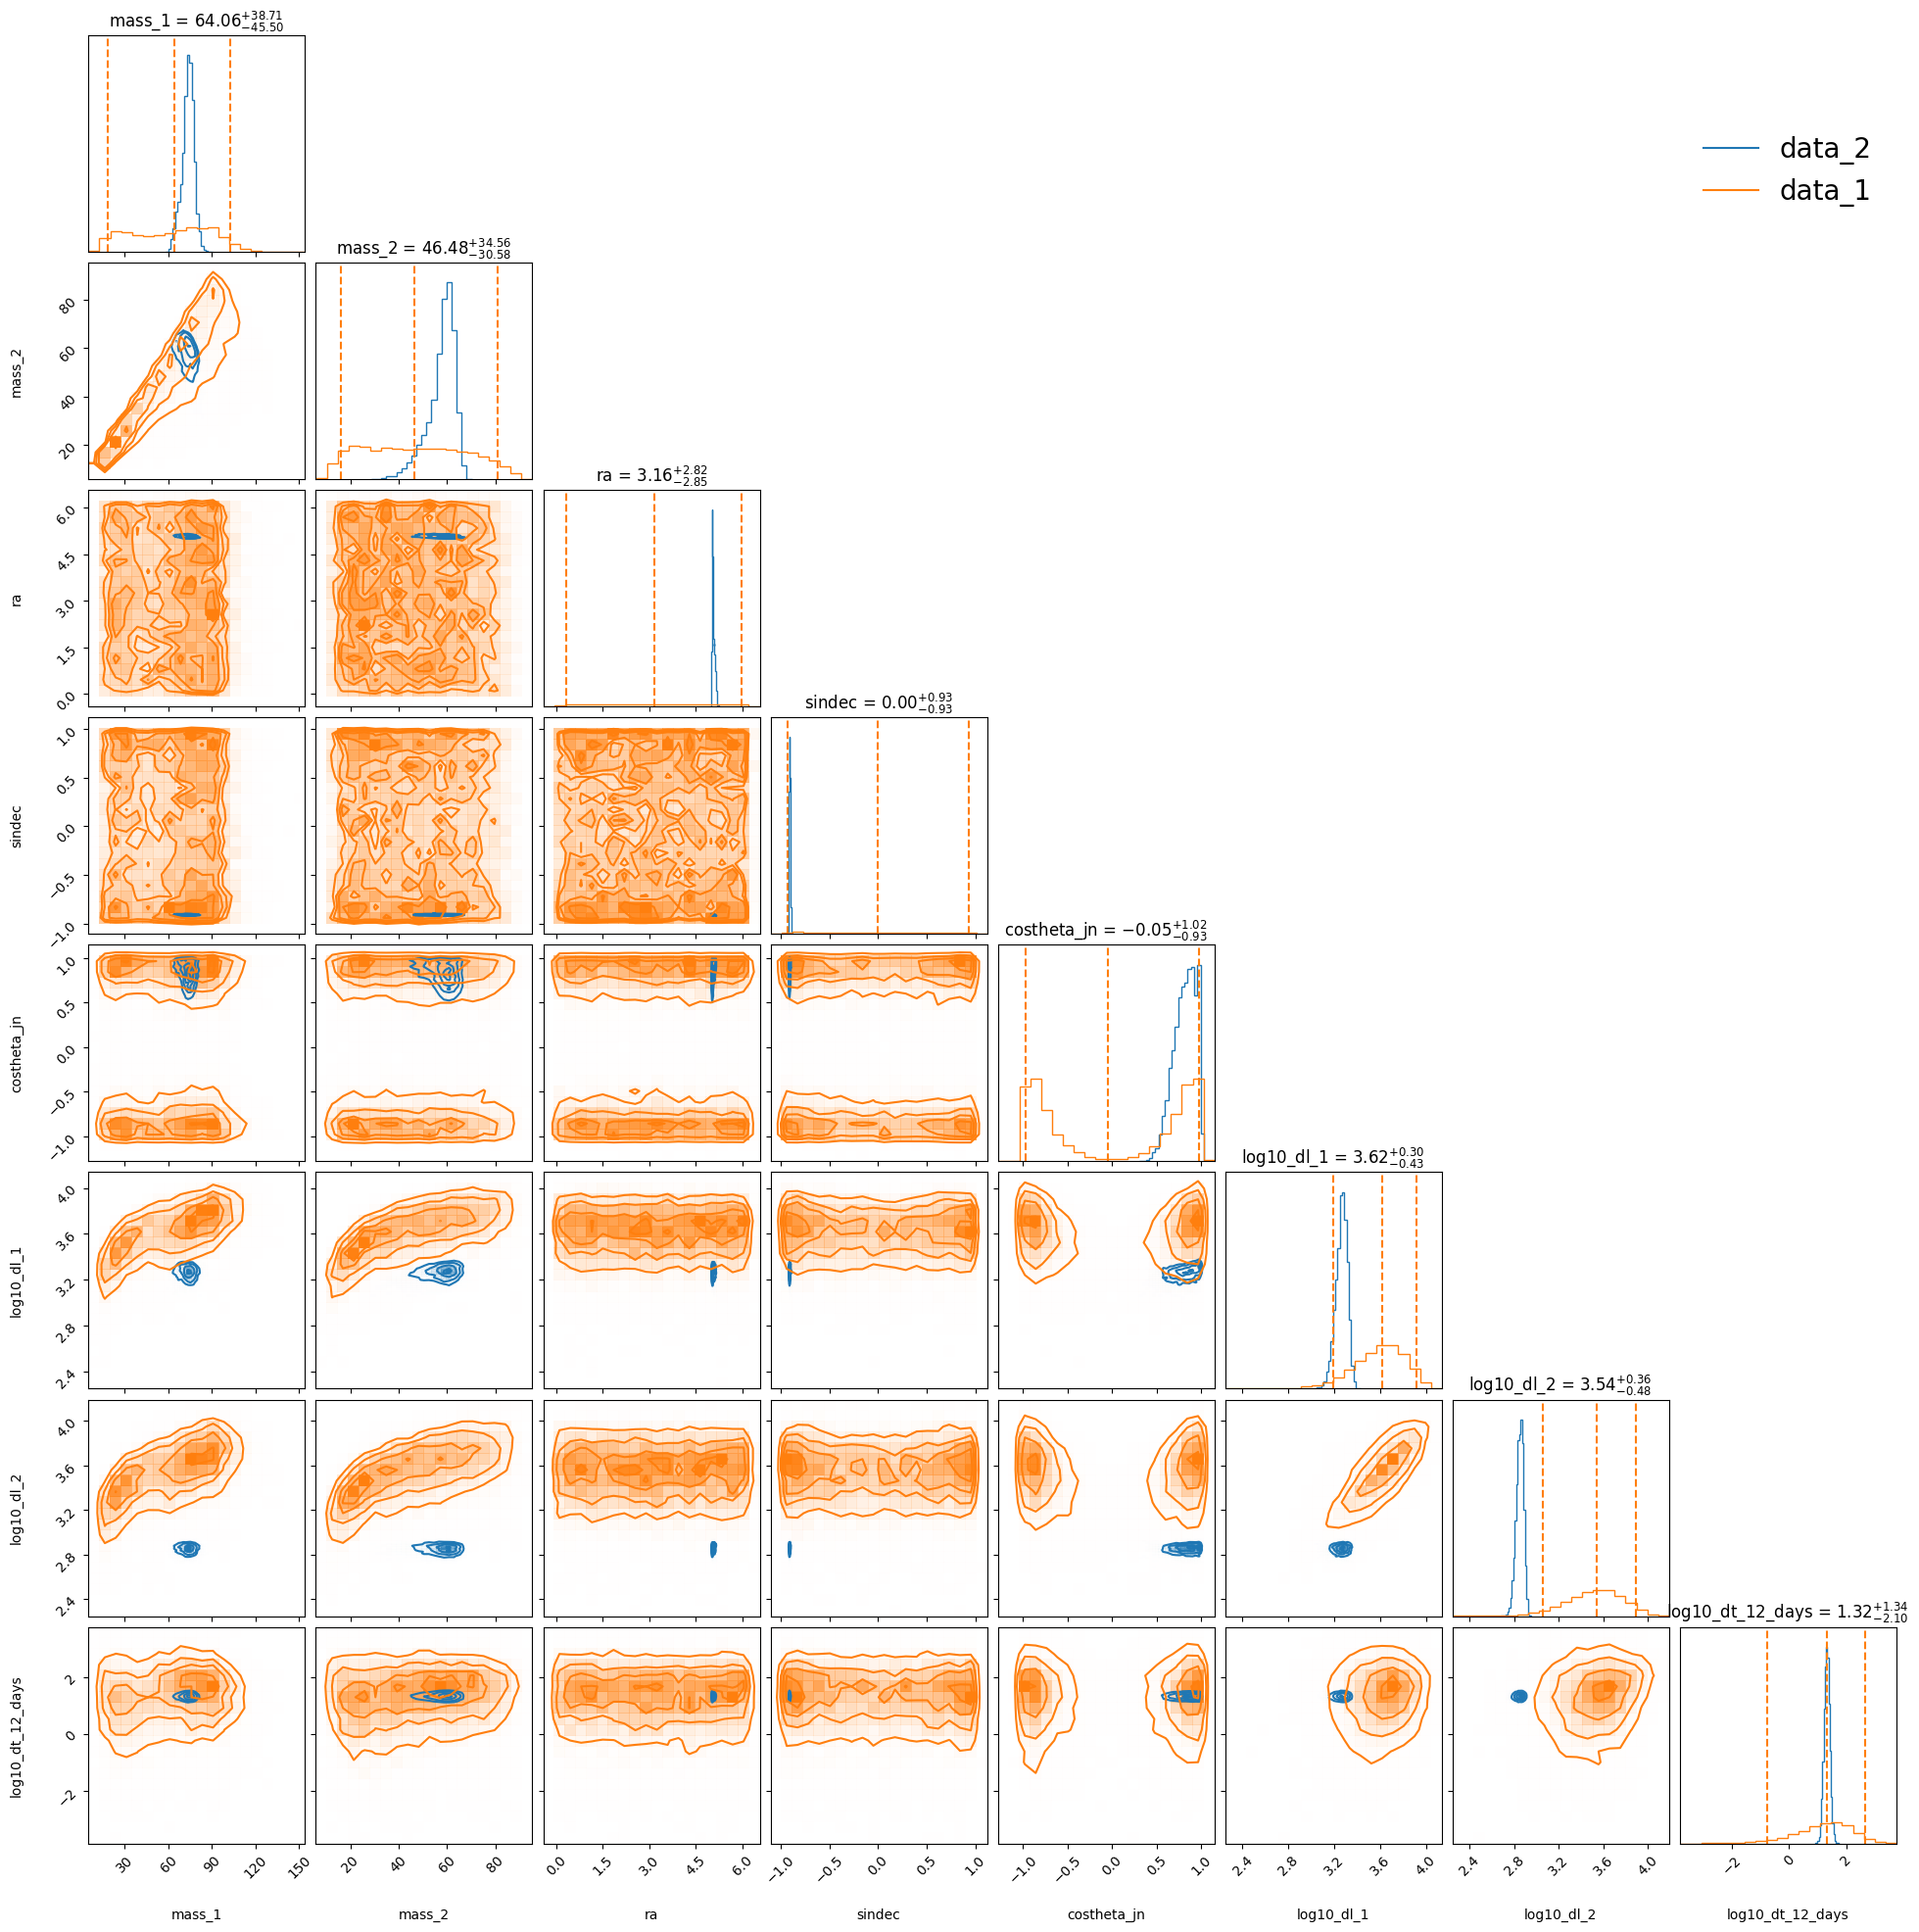

In [120]:
test.plot(data_astro_lensed, data_posterior_combine)

In [175]:
data_pe_prior = test.pe_prior.resample(size=20000)
data_pe_prior.keys()

dict_keys(['mass_1', 'mass_2', 'ra', 'sindec', 'costheta_jn', 'log10_dl'])

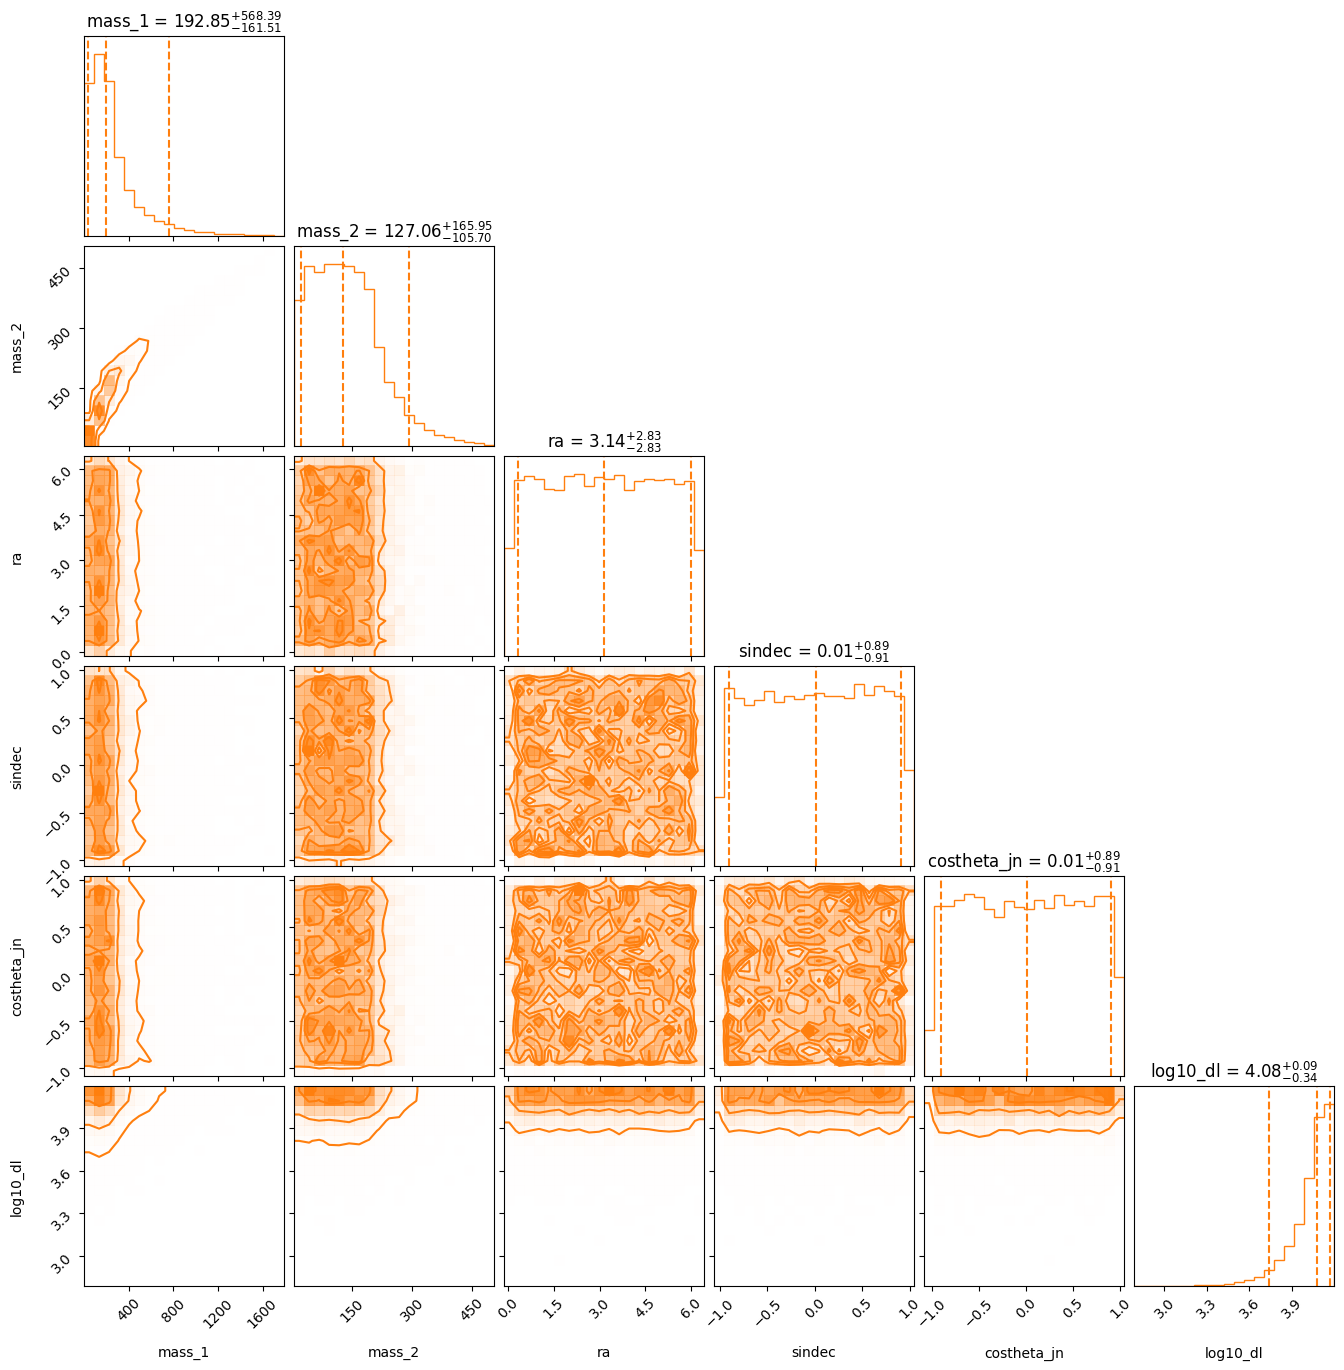

In [176]:
test.plot(data_pe_prior)